In [217]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES

In [218]:
import re

def convert_google_sheet_url(url):
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    new_url = re.sub(pattern, replacement, url)

    return new_url

import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/edit#gid=0'

new_url = convert_google_sheet_url(url)

print(new_url)

df = pd.read_csv(new_url)

df.dropna(subset=['F Group'], inplace=True)

smiles_to_id = {}
for index, row in df.iterrows():
    smiles_to_id[row['Amide SMILES']] = row['Amide ID']

https://docs.google.com/spreadsheets/d/1CzpQGGeGzVZ0sv-pUm6jfaQ2dB6vecDpXeotMhIpUnQ/export?gid=0&format=csv


In [219]:
SME_fluorine_secondary = {'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.187, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.368, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': -0.13910609483718872, 'O=C(N1CCCC1)C1=CC=CC=C1': -0.0785289853811264, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.09564696997404099, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.267, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.175, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.455, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.17767366766929626, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': -0.24370118975639343, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.4168475270271301, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.24286195635795593, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.244, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.5416865944862366, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.563825786113739, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': 0.05, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.056, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 0.214, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': -0.203, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': -0.8497052192687988, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 0.071, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.07352640479803085, 'O=C(N1CCC1)C1=CC=CC=C1': -0.21231365203857422, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.203, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.282, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.022, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.134, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.219, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.018, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.043, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.024, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.012, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.136, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.05, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': -0.047, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.087, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.107, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.075, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.349, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.035, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': -0.098, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.383, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.059, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.046, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.104, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.07, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.296, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.118, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.167, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.135, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.069, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.233, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.6178117394447327, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': 0.093, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.037, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.177, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': -0.096}
SME_fluorine_primary = {'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.102, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 0.148, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.5560212731361389, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.10438874363899231, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.07871818542480469, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.084, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.102, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.48, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.204, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.077, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.152, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.139, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.065, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': -0.169, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.148, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.117, 'CCNC(=O)C1=CC=CC=C1': -0.12051695585250854, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.117, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.092, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.292, 'CCCNC(=O)C1=CC=CC=C1': 0.205240398645401, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 0.098, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 0.11, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 0.044, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': 0.033, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 0.181, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': 0.16, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': 0.074, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 0.079, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': -0.036, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.068, 'O=C(NC1CC1)C1=CC=CC=C1': -0.43602603673934937, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.07746684551239014, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.5208727121353149, 'CCCCNC(=O)C1=CC=CC=C1': 0.5117113590240479, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.5353040099143982, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 0.01, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.657, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.666, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.367, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.073, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.212, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.14091069996356964, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -0.1338529884815216, 'O=C(NC1CC11CC1)C1=CC=CC=C1': -0.3784183859825134, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 0.174, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.14188742637634277, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.076, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.364, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.109, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 0.031, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.015, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.24, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.067, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.258}
SME_fluorine_acid = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.8385061025619507, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 1.100967526435852, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.2069711685180664, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.318, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.179, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.6919602751731873, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 0.158, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.364, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.135, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.362, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.236, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.2, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.185, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.115, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.001, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 0.15, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 0.108, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 0.34, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 0.194, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 0.345, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 0.278, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 0.377, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.153, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.1, 'O=C(NC1=CC=CC=C1)C1CC1': 0.07960078120231628, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.6989073753356934, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.5161060690879822, 'CCCCC(=O)NC1=CC=CC=C1': 0.4149327874183655, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.077, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': -0.3112223148345947, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': -0.6478965878486633, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.757, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.083, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.042, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.575, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.288, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.014, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.15, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': -0.238, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.20668798685073853, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.05, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.105, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': -0.11, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 0.227, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 0.157, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 1.1566007137298584, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.6454155445098877, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.14, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 0.172, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.4221980571746826, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 0.173, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 0.115}

# SME_fluorine = SME_fluorine_secondary.copy()
# SME_fluorine.update(SME_fluorine_primary)
# SME_fluorine.update(SME_fluorine_acid)

SME_fluorine = SME_fluorine_acid.copy()

relevances_fluorine = {}
for smiles, relevance in SME_fluorine.items():
    if "cis" in smiles_to_id[smiles] or "trans" in smiles_to_id[smiles]:
        relevances_fluorine[smiles] = relevance
SME_fluorine = relevances_fluorine.copy()



SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_SMILES, test_SMILES = train_test_smiles_data(False)

In [220]:
SME_fluorine_canon_smiles = {}
for smiles, sme in SME_fluorine.items():
    SME_fluorine_canon_smiles[Chem.CanonSmiles(smiles)] = sme

In [221]:
# df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)
df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)

gem_SME, CHF_SME, CHF2_SME, CH2F_SME, CF3_SME = [], [], [], [], []
gem, CHF, CHF2, CH2F, CF3 = [], [], [], [], []

for SMILES, relevance in SME_fluorine.items():

    if SMILES not in train_SMILES and SMILES not in test_SMILES:
        continue
    
    fluorine_group = SMILES_to_fgroup[SMILES]
    identificator = SMILES_to_identificator[SMILES]
    logP = SMILES_to_logP[SMILES]

    
    # if "sec" not in identificator.lower() or 's' in SMILES.lower():
    #     continue
    
    if fluorine_group not in ['CF3', 'gem-CF2', 'CHF2', 'CH2F', 'CHF']:
        continue
    
    if fluorine_group == 'gem-CF2':
        gem.append(logP)
        gem_SME.append(SME_fluorine[SMILES])
    elif fluorine_group == 'CHF':
        CHF.append(logP)
        CHF_SME.append(SME_fluorine[SMILES])
    elif fluorine_group == 'CHF2':
        CHF2.append(logP)
        CHF2_SME.append(SME_fluorine[SMILES])
    elif fluorine_group == 'CH2F':
        CH2F.append(logP)
        CH2F_SME.append(SME_fluorine[SMILES])
    elif fluorine_group == 'CF3':
        CF3.append(logP)
        CF3_SME.append(SME_fluorine[SMILES])

    print(SMILES, fluorine_group, logP)
    

FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 gem-CF2 2.37
FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 gem-CF2 2.88
FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CF3 3.02
FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CF3 2.72
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CHF2 2.39
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CHF2 2.23
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CH2F 2.14
[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 CH2F 1.96
FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 CF3 2.88
[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 CHF2 2.22
[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 CH2F 2.11
FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 CF3 2.98
FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 CF3 2.12
[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 CHF2 2.28
[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 CHF2 2.35
[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 CH2F 1.12


In [222]:
# print(f"gem: {sum(gem) / len(gem)}, CHF: {sum(CHF) / len(CHF)}, CHF2: {sum(CHF2) / len(CHF2)}, CH2F: {sum(CH2F) / len(CH2F)}, CF3: {sum(CF3) / len(CF3)}")

---------

---------

---------

---------

---------

SME per class

In [223]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "CHF-double": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [224]:
functional_group_to_smiles

{'CF3': 'CC(F)(F)F',
 'CH2F': 'CCF',
 'gem-CF2': 'CF',
 'CHF2': 'CC(F)(F)',
 'CHF': 'CF',
 'CHF-double': 'CF',
 'non-F': ''}

In [225]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

for SMILES, relevance in SME_fluorine.items():
    id = smiles_to_id[SMILES]
    if "β" in id:
        smiles_to_distance_to_nitrogen[SMILES] = 2
    elif "γ" in id:
        smiles_to_distance_to_nitrogen[SMILES] = 3
    elif "δ" in id:
        smiles_to_distance_to_nitrogen[SMILES] = 4
    
    print(SMILES, id)
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)


# for SMILES, relevance in SME_fluorine.items():
#     id = smiles_to_id[SMILES]
#     if "β" in id and "γ" not in id and "δ" not in id:
#         smiles_to_distance_to_nitrogen[SMILES] = 2
#     elif "γ" in id and "β" not in id and "δ" not in id:
#         smiles_to_distance_to_nitrogen[SMILES] = 3
#     elif "δ" in id and "β" not in id and "γ" not in id:
#         smiles_to_distance_to_nitrogen[SMILES] = 4

O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1 trans-6{15,0}
O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1 cis-6{15,0}
FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 cis-δ-6{15,6}
FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 trans-δ-6{15,6}
FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 trans-γ-6{4,5}
FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 cis-γ-6{4,5}
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 trans-γ-6{4,4}
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 cis-γ-6{4,4}
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 trans-γ-6{4,3}
[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 cis-γ-6{4,3}
FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 cis-β-6{4,5}
[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{4,4}
[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{4,3}
FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{3,5}
FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 cis-β-6{3,5}
[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 trans-β-6{3,4}
[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 cis-β-6{3,4}
[H]C([H])(F)[

cis CF3 FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.88 0.757 Carboxylic acid
trans CHF2 [H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.22 0.083 Carboxylic acid
trans CH2F [H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1 2.11 0.042 Carboxylic acid
trans CF3 FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.98 0.575 Carboxylic acid
cis CF3 FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.12 0.288 Carboxylic acid
trans CHF2 [H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 2.28 0.014 Carboxylic acid
cis CHF2 [H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1 2.35 0.15 Carboxylic acid
trans CH2F [H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1 1.12 -0.238 Carboxylic acid
['CH2F', 'CHF2', 'CF3'] [-0.098, 0.049, 0.575]
['CHF2', 'CF3'] [0.15, 0.522]
['CH2F', 'CHF2', 'CF3'] [[-0.09799999999999999], [0.0485, 0.15], [0.575, 0.5225]]


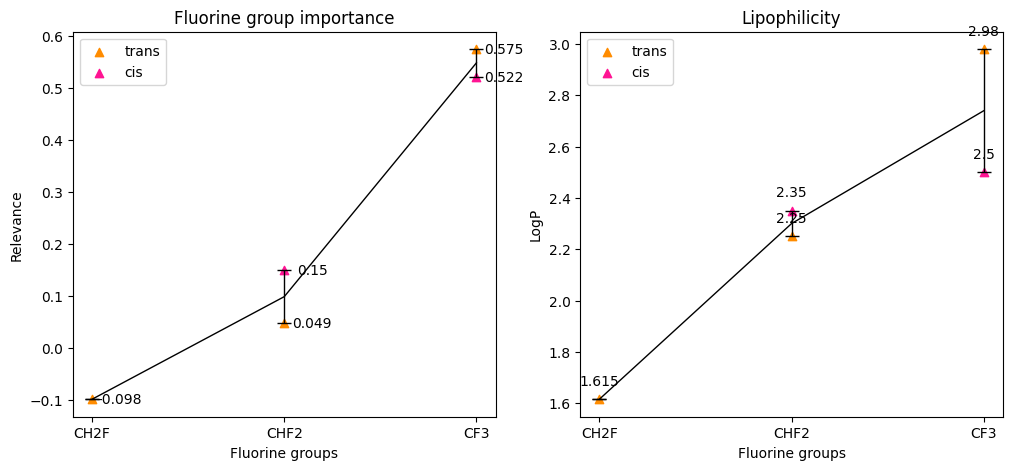

trans CF3 FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 3.02 0.362 Carboxylic acid
cis CF3 FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.72 0.236 Carboxylic acid
trans CHF2 [H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.39 0.2 Carboxylic acid
cis CHF2 [H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.23 0.185 Carboxylic acid
trans CH2F [H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 2.14 -0.115 Carboxylic acid
cis CH2F [H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 1.96 -0.001 Carboxylic acid
['CH2F', 'CHF2', 'CF3'] [-0.115, 0.2, 0.362]
['CH2F', 'CHF2', 'CF3'] [-0.001, 0.185, 0.236]
['CH2F', 'CHF2', 'CF3'] [[-0.115, -0.001], [0.2, 0.185], [0.362, 0.236]]


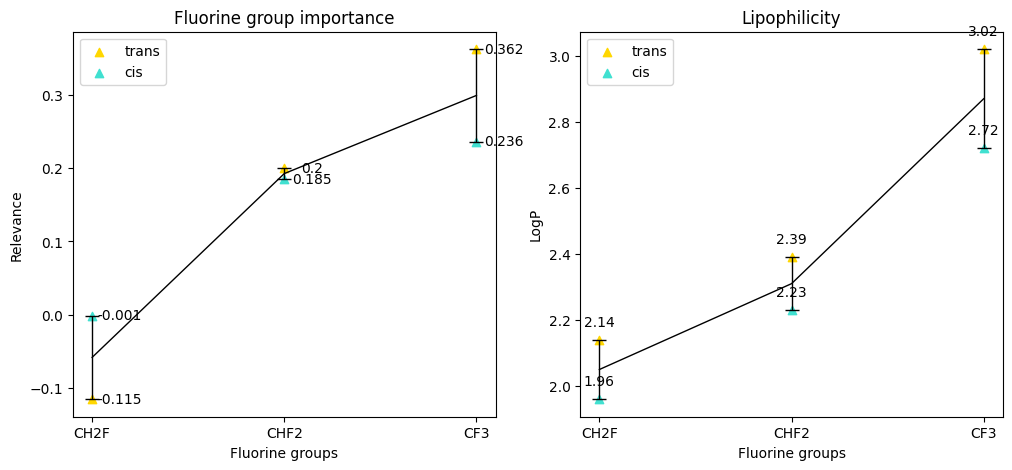

cis gem-CF2 FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 2.37 0.318 Carboxylic acid
trans gem-CF2 FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 2.88 0.179 Carboxylic acid
['gem-CF2'] [0.179]
['gem-CF2'] [0.318]
['gem-CF2'] [[0.179, 0.318]]


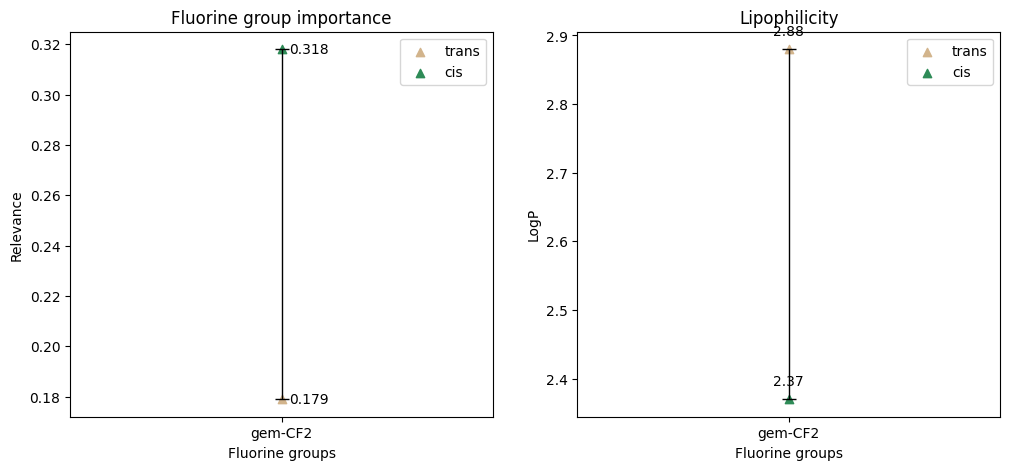

In [226]:
import matplotlib.pyplot as plt
import numpy as np

cis_color = {1: 'indigo', 2: 'deeppink', 3: 'turquoise', 4: 'seagreen'}
trans_color = {1: 'plum', 2: 'darkorange', 3: 'gold', 4: 'tan'}

cis_name = 'cis'
trans_name = 'trans'

cis = {1: {}, 2: {}, 3: {}, 4: {}}
trans = {1: {}, 2: {}, 3: {}, 4: {}}

cis_logP = {1: {}, 2: {}, 3: {}, 4: {}}
trans_logP = {1: {}, 2: {}, 3: {}, 4: {}}

for distance_global in range(2, 5):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    X_optimal = ['CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        
        if 'cis' in smiles_to_id[SMILES]:
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cis[distance_global]:
                cis[distance_global][f_group].append(SME_fluorine[SMILES])
                cis_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cis[distance_global][f_group] = [SME_fluorine[SMILES]]
                cis_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cis", f_group, SMILES, logP_value, SME_fluorine[SMILES], SMILES_to_identificator[SMILES])

        elif 'trans' in smiles_to_id[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in trans[distance_global]:
                trans[distance_global][f_group].append(SME_fluorine[SMILES])
                trans_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                trans[distance_global][f_group] = [SME_fluorine[SMILES]]
                trans_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("trans", f_group, SMILES, logP_value, SME_fluorine[SMILES], SMILES_to_identificator[SMILES])


    # print(cis)
    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [
        (trans, trans_color, trans_name, trans_logP),
        (cis, cis_color, cis_name, cis_logP), 
    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            
            

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(round(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]), 3))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(round(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]), 3))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


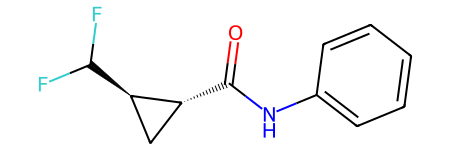

In [227]:
from rdkit import Chem

smi = "[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1"
canon_smi = Chem.CanonSmiles(smi)

Chem.MolFromSmiles(canon_smi)

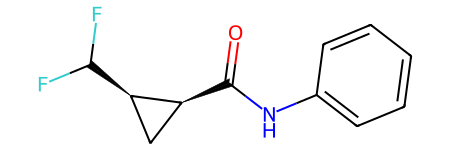

In [228]:
from rdkit import Chem

smi = "[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1"
canon_smi = Chem.CanonSmiles(smi)

Chem.MolFromSmiles(canon_smi)